# Problem for Gender classififcation.

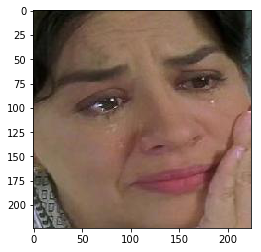

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread('U:/DataAnalysis/CV101-master/datasets/male_vs_female_classification/images/0.jpg')
plt.imshow(img)

In [2]:
img.shape

(224, 224, 3)

In [3]:
# Import the training xls
import pandas as pd
df = pd.read_csv('U:/DataAnalysis/CV101-master/datasets/male_vs_female_classification/train.csv')
df.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [4]:
df['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

Female


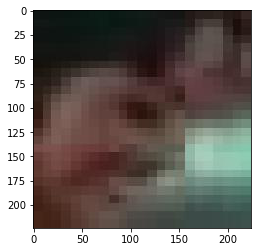

In [5]:
#I want to know which value represents which class
import numpy as np
rng = np.random.RandomState()
#get random file and check the value
row_index = rng.choice(df.index)
image_name  = df.iloc[row_index]['image_names']
img = plt.imread('U:/DataAnalysis/CV101-master/datasets/male_vs_female_classification/images/'+image_name)
plt.imshow(img)

classification_val = df.iloc[row_index]['class']
if classification_val == 1:
    print("It is a male")
else: 
    print("Female")

In [6]:
#Lets store images in list .
X = []
for img_name in df.image_names:
    img = plt.imread('U:/DataAnalysis/CV101-master/datasets/male_vs_female_classification/images/'+img_name)
    X.append(img)
# Convert in numpy array
X = np.array(X)
X.shape

(12196, 224, 224, 3)

In [14]:
Y = df['class'].values
Y.shape
#Convert to categorical value
from keras.utils import to_categorical
Y = to_categorical(Y)
Y.shape

(12196, 2)

In [17]:
#split the data in train and test
from sklearn.model_selection import train_test_split
x_train, x_valid , y_train, y_valid = train_test_split(X,Y, test_size = 0.3, random_state=45)

In [18]:
# Using VGG16 model on dataset
from keras.applications.vgg16 import VGG16
base_model=VGG16(weights='imagenet')
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
# VGG16 taskes same input as we have in data set ie of shape ( 224, 224, 3) 
# However the predictions have 1000 classification which we dont want so lets remove it.

base_model = VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [20]:
#Extract Features
base_model_train = base_model.predict(x_train)
base_model_valid = base_model.predict(x_valid)

In [21]:
base_model_train.shape

(8537, 7, 7, 512)

In [22]:
base_model_valid.shape

(3659, 7, 7, 512)

In [23]:
#Reshape
base_model_train = base_model_train.reshape(8537,7*7*512)
base_model_valid = base_model_valid.reshape(3659, 7*7*512)


In [25]:
max_val=base_model_train.max()

In [26]:
#Rescale the features
base_model_train = base_model_train / max_val
base_model_valid = base_model_valid / max_val
base_model_train.min(), base_model_train.max()

(0.0, 1.0)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer
model = Sequential()
model.add(InputLayer((7*7*512,)))
model.add(Dense(units=1024, activation ='relu'))
model.add(Dense(units=2, activation = 'softmax'))
model.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(base_model_train,y_train, epochs=15, validation_data=(base_model_valid, y_valid))

Train on 8537 samples, validate on 3659 samples
Epoch 1/15
8537/8537 [==============================] - 48s - loss: 0.6862 - acc: 0.6014 - val_loss: 0.6789 - val_acc: 0.6319
Epoch 2/15
8537/8537 [==============================] - 47s - loss: 0.6703 - acc: 0.6561 - val_loss: 0.6634 - val_acc: 0.6392
Epoch 3/15
8537/8537 [==============================] - 47s - loss: 0.6528 - acc: 0.6645 - val_loss: 0.6460 - val_acc: 0.6619
Epoch 4/15
8537/8537 [==============================] - 49s - loss: 0.6332 - acc: 0.6925 - val_loss: 0.6264 - val_acc: 0.6901
Epoch 5/15
8537/8537 [==============================] - 52s - loss: 0.6115 - acc: 0.7216 - val_loss: 0.6052 - val_acc: 0.7133
Epoch 6/15
8537/8537 [==============================] - 48s - loss: 0.5886 - acc: 0.7435 - val_loss: 0.5833 - val_acc: 0.7453
Epoch 7/15
8537/8537 [==============================] - 48s - loss: 0.5653 - acc: 0.7633 - val_loss: 0.5618 - val_acc: 0.7551
Epoch 8/15
8537/8537 [==============================] - 52s - loss: 0.

In [34]:
#Predict the values.

predictions = model.predict_classes(base_model_valid)
predictions

3648/3659 [============================>.] - ETA: 0s

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
#predict probabilities

prediction_prob = model.predict(base_model_valid)
prediction_prob


array([[ 0.65641856,  0.34358147],
       [ 0.04448548,  0.95551449],
       [ 0.98568243,  0.01431755],
       ..., 
       [ 0.8628028 ,  0.13719724],
       [ 0.54188222,  0.45811772],
       [ 0.07968573,  0.92031431]], dtype=float32)

3987.jpg
Probabilty of Male : 65%
Actual Class :1


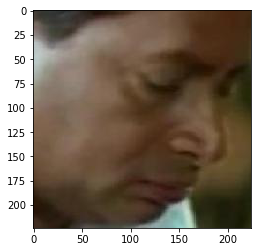

In [52]:
#pull images from validation data set
_,validation_images,_,_=train_test_split(df['image_names'].values,Y, test_size = 0.3, random_state=45)
#Get random image and check
validation_images

img_name = rng.choice(validation_images)
probab= (prediction_prob[:,1]*100).astype(int)[np.where(validation_images == img_name)[0][0]]
actual_class = df.loc[df.image_names == img_name,'class'].values[0]
print(img_name)
img = plt.imread('U:/DataAnalysis/CV101-master/datasets/male_vs_female_classification/images/' + img_name)
print("Probabilty of Male : {}%".format(probab))
print("Actual Class :{}".format(actual_class))
plt.imshow(img)

In [53]:
# Generate model for test data set.

#load data
df_test = pd.read_csv('U:/DataAnalysis/CV101-master/datasets/male_vs_female_classification/test.csv')

In [54]:
#Creating a format to fit in model
#Lets store images in list .
X_test = []
for img_name in df_test.image_names:
    img = plt.imread('U:/DataAnalysis/CV101-master/datasets/male_vs_female_classification/images/'+img_name)
    X_test.append(img)
# Convert in numpy array
X_test = np.array(X_test)
X_test.shape
base_model_test = base_model.predict(X_test)
base_model_test = base_model_test / max_val

In [56]:
base_model_test.shape

(5227, 7, 7, 512)

In [58]:
base_model_test = base_model_test.reshape(5227, 7*7*512)
base_model_test.shape

(5227, 25088)

In [59]:
predictions_test = model.predict_classes(base_model_test)
predictions_test

5216/5227 [============================>.] - ETA: 0s

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [62]:
df_test['class'] = predictions_test
df_test.head()

,image_names,class
0,5603.jpg,1
1,1286.jpg,1
2,9815.jpg,0
3,8865.jpg,1
4,9306.jpg,1


In [66]:
df_test.to_csv('Solution_Gender_classify.csv',index=False)

AttributeError: 'DataFrame' object has no attribute 'summary'